In [330]:
# Libs para Modelagem e Matrizes
import pandas as pd
import numpy as np

# Libs para Analises Graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')


In [331]:
# Lendo dados
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin1')

# Verficando dados 
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [332]:
#Dimensão

df.shape

(1034, 9)

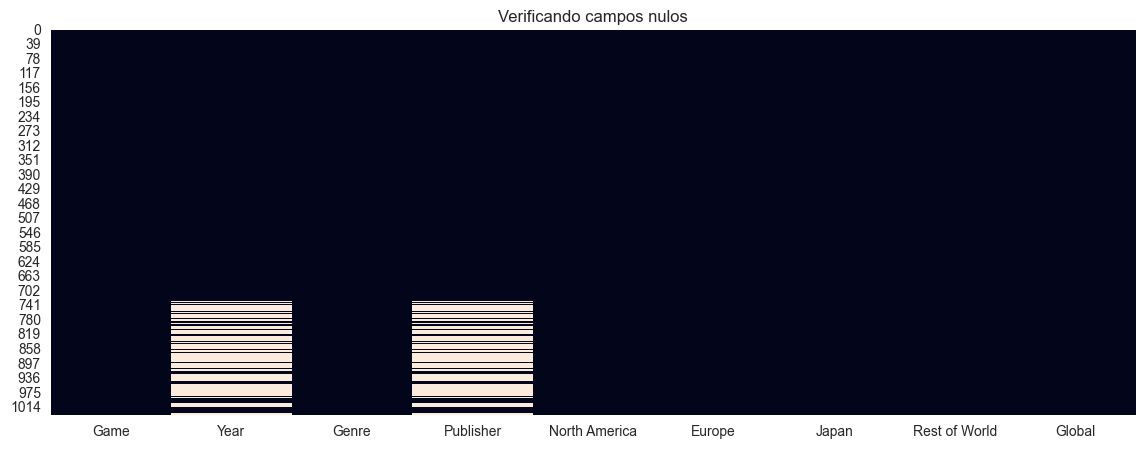

In [333]:
# Criando grafico par analisar campos nulos
plt.figure(figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap(df.isnull(), cbar=False);


In [334]:
#Retirando valores nulos 
df.dropna(inplace = True)

#verifcando
df.shape

(825, 9)

In [335]:
# Estatisticas
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


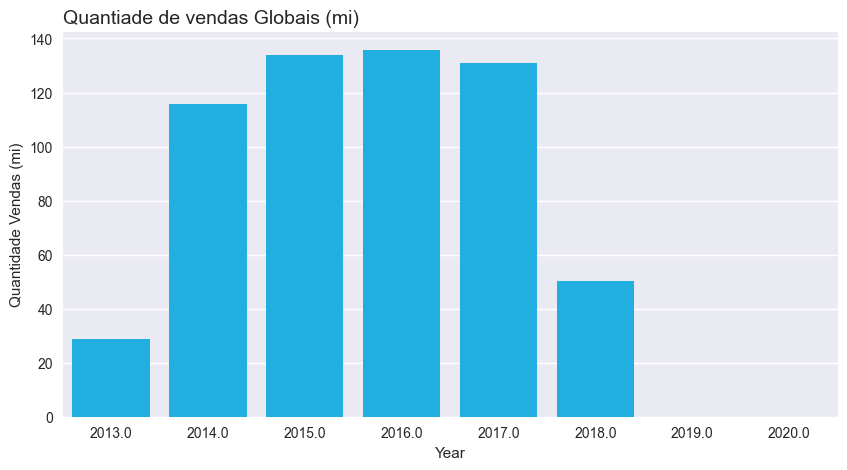

In [336]:
plt.figure(figsize=(10,5))
plt.title('Quantiade de vendas Globais (mi)', loc = 'left', fontsize = 14)
sns.barplot(data=df, x='Year', y='Global', ci=False, color='#00BFFF', estimator=sum)
plt.ylabel('Quantidade Vendas (mi)');


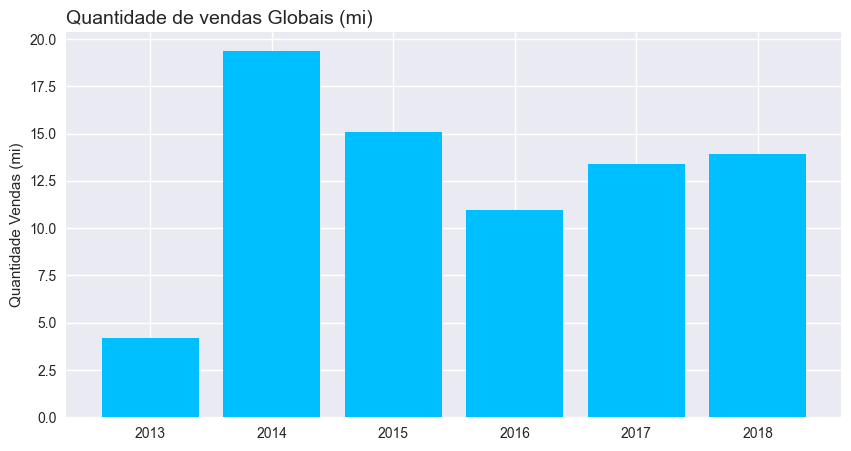

In [337]:
# Retirando ano de 2019 e 2020
df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]


# PLOTANDO NOVAMENTE O GRAFICO SEM OS ANOS RETIRADOS

plt.figure(figsize=(10,5))
plt.title('Quantidade de vendas Globais (mi)', loc = 'left', fontsize = 14)
plt.bar(df['Year'], df['Global'], color='#00BFFF')
plt.ylabel('Quantidade Vendas (mi)');

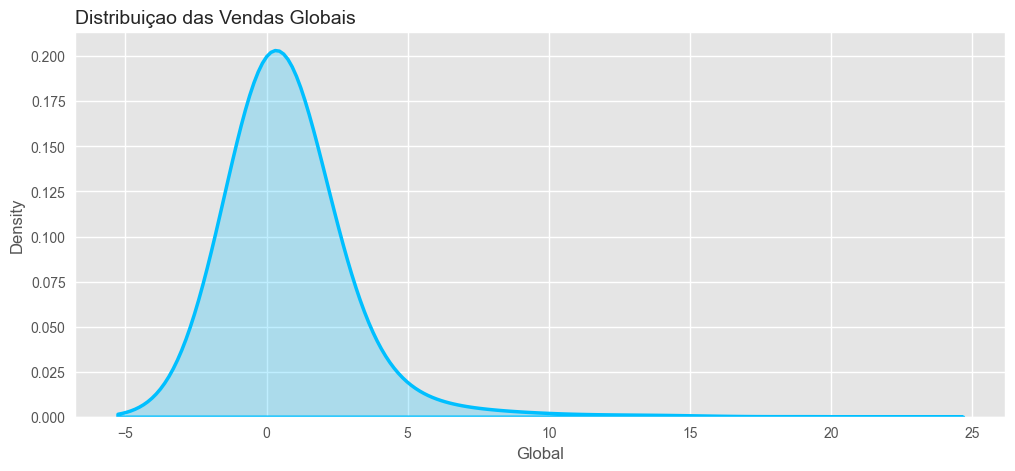

In [338]:
# PLOTANDO GRAFICO KDE

plt.figure(figsize=(12,5))
plt.style.use('ggplot')

plt.title('Distribuiçao das Vendas Globais', loc='left', fontsize = 14)
sns.kdeplot(df['Global'], shade = True, bw=1, color='#00BFFF', linewidth = 2.5);


In [339]:
# Agrupando Dados por Ano
Analise = df.groupby('Year').sum()
Analise

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


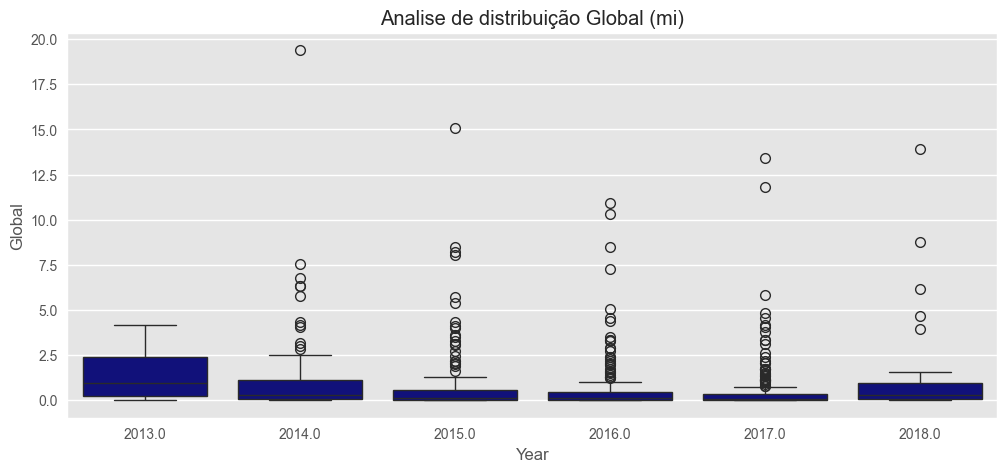

In [340]:
plt.figure(figsize=(12,5))
plt.title('Analise de distribuição Global (mi)')
sns.boxplot(data=df, x='Year', y='Global', color = '#00008B');

In [341]:
df.loc[df['Global'] >= 10]
Analise

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


In [342]:
America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

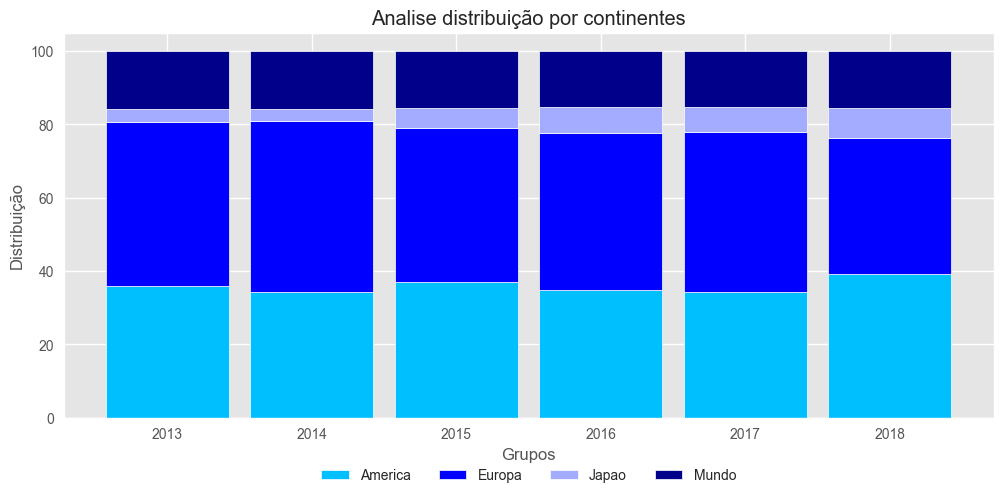

In [343]:
# Tamanho grafico
plt.figure(figsize=(12,5))

# Largura barra no grafico
largura_barra = 0.85
Grupos =  Analise.index

# titulo
plt.title('Analise distribuição por continentes')

#Plot da America
plt.bar(Grupos, America, width = largura_barra, color = '#00BFFF', edgecolor= 'white')

#Plot da Europa
plt.bar(Grupos, Europa , bottom=America, width = largura_barra, color = '#0000FF', edgecolor= 'white')

#Plot da Japao
plt.bar(Grupos, Japao , bottom=[ A + B for A, B in zip(America, Europa)], width = largura_barra, color = '#a3acff', edgecolor= 'white')

#Plot da Mundo
plt.bar(Grupos, Mundo , bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao)], width = largura_barra, color = '#00008B', edgecolor= 'white')

# Labels
plt.xticks = (Grupos, Rotulos)
plt.xlabel('Grupos')
plt.ylabel('Distribuição')

plt.legend(['America', 'Europa', 'Japao', 'Mundo'], loc = 'center', bbox_to_anchor=(0.5, -0.15), ncols= 4 );


In [344]:
from sklearn.preprocessing import LabelEncoder

Funcao_Label = LabelEncoder()

df['Produtor'] = Funcao_Label.fit_transform(df['Publisher'])
df['Genero'] = Funcao_Label.fit_transform(df['Genre'])
df['Jogo'] = Funcao_Label.fit_transform(df['Game'])


df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,0,72
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,8,802
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00,34,2,107
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00,17,0,114


In [345]:
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,0,72
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,8,802
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00,34,2,107
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00,17,0,114


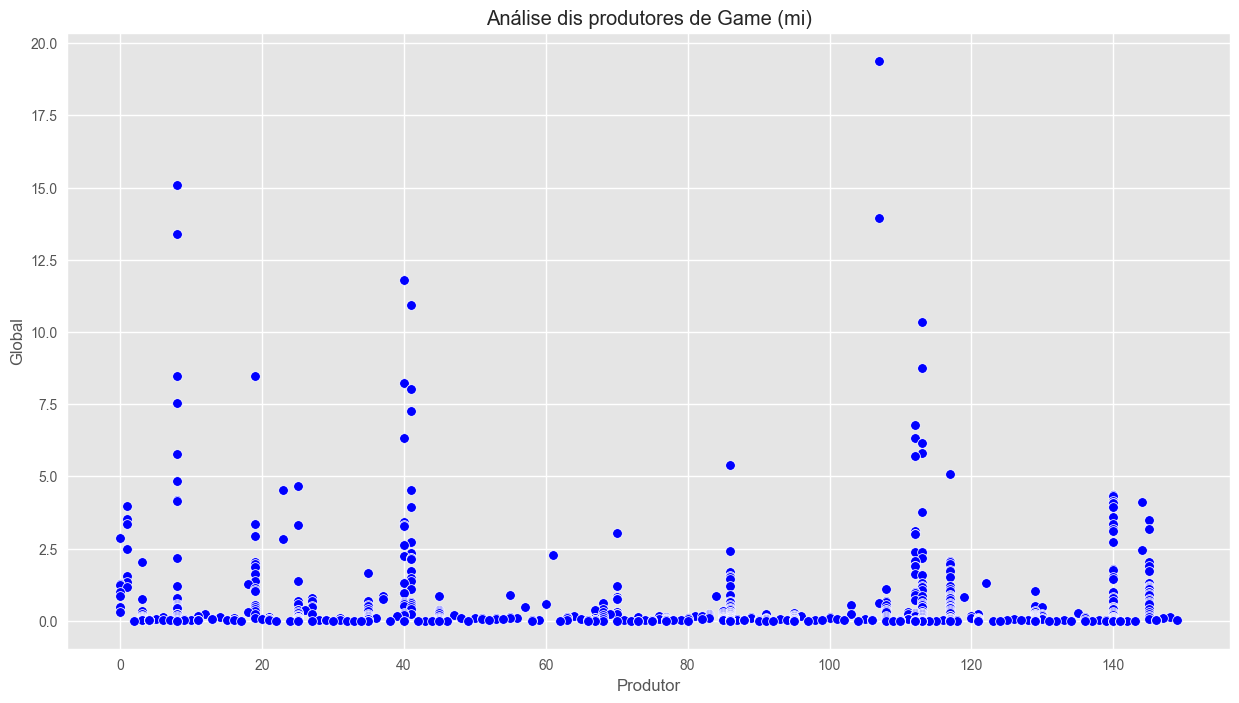

In [346]:
plt.figure(figsize=(15,8))
plt.title('Análise dis produtores de Game (mi)')
sns.scatterplot(df, x='Produtor', y='Global', color ='#0000FF');

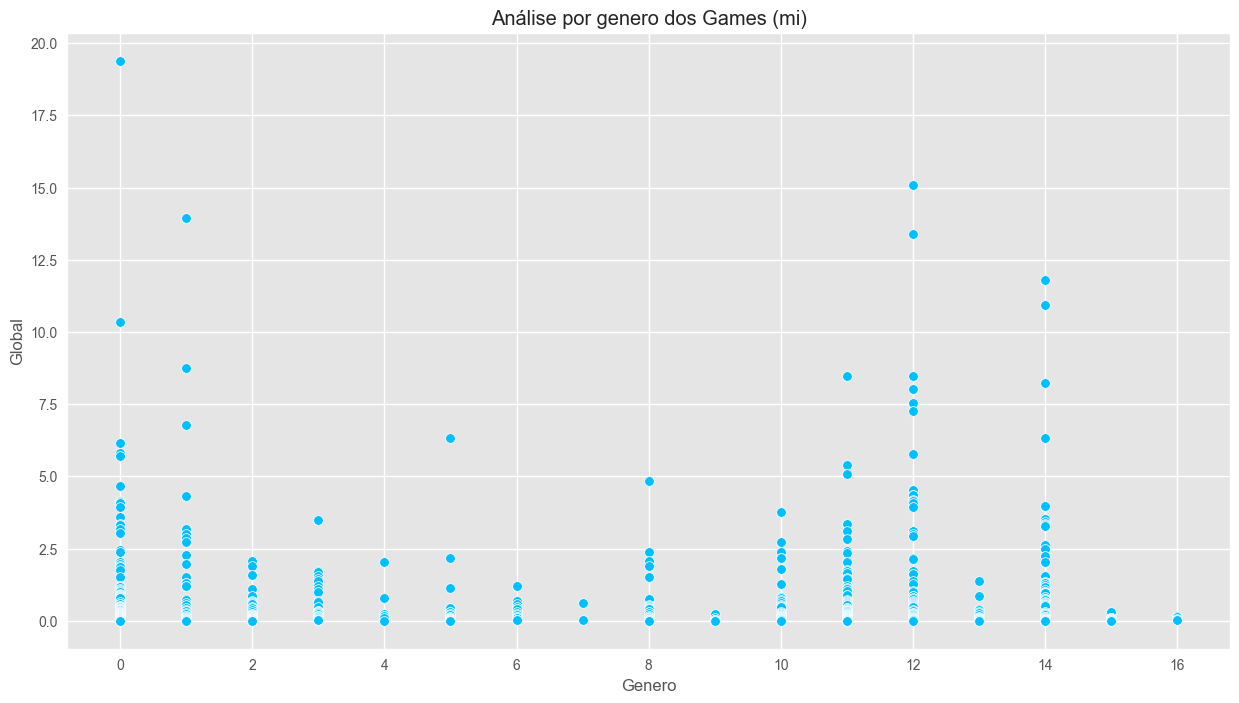

In [347]:
plt.figure(figsize=(15,8))
plt.title('Análise por genero dos Games (mi)')
sns.scatterplot(df, x='Genero', y='Global', color ='#00BFFF');

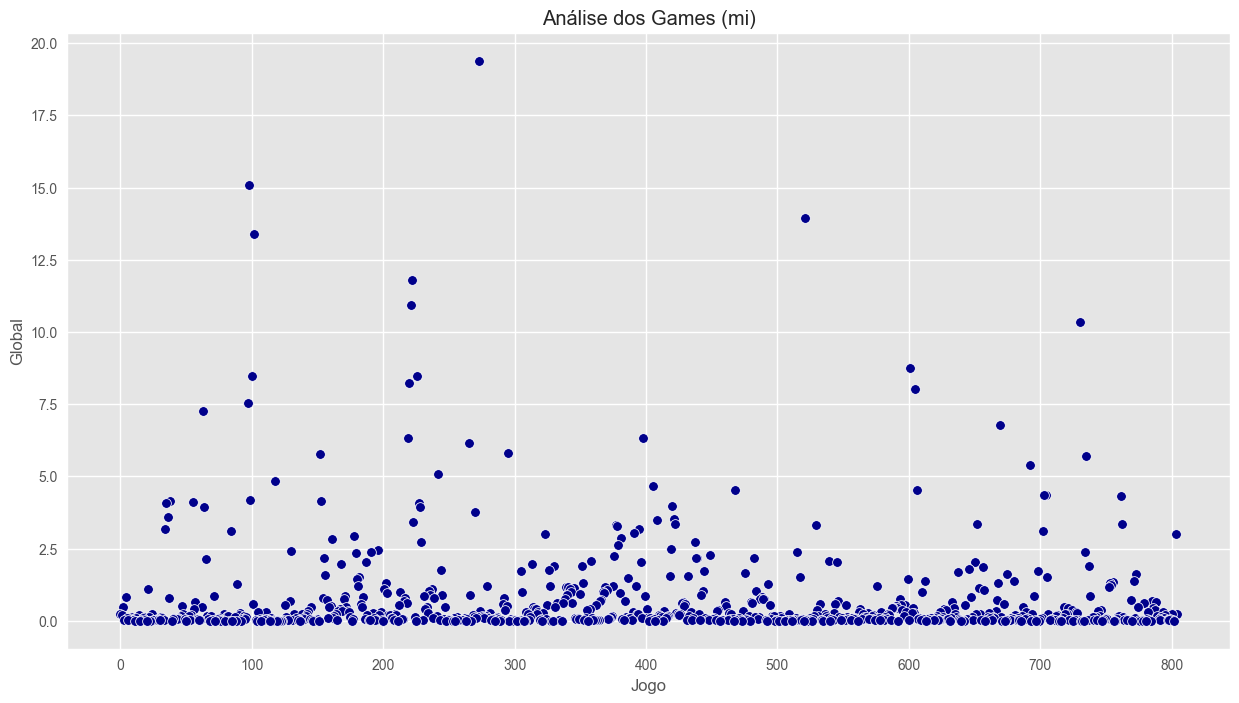

In [348]:
plt.figure(figsize=(15,8))
plt.title('Análise dos Games (mi)')
sns.scatterplot(df, x='Jogo', y='Global', color ='#00008B');

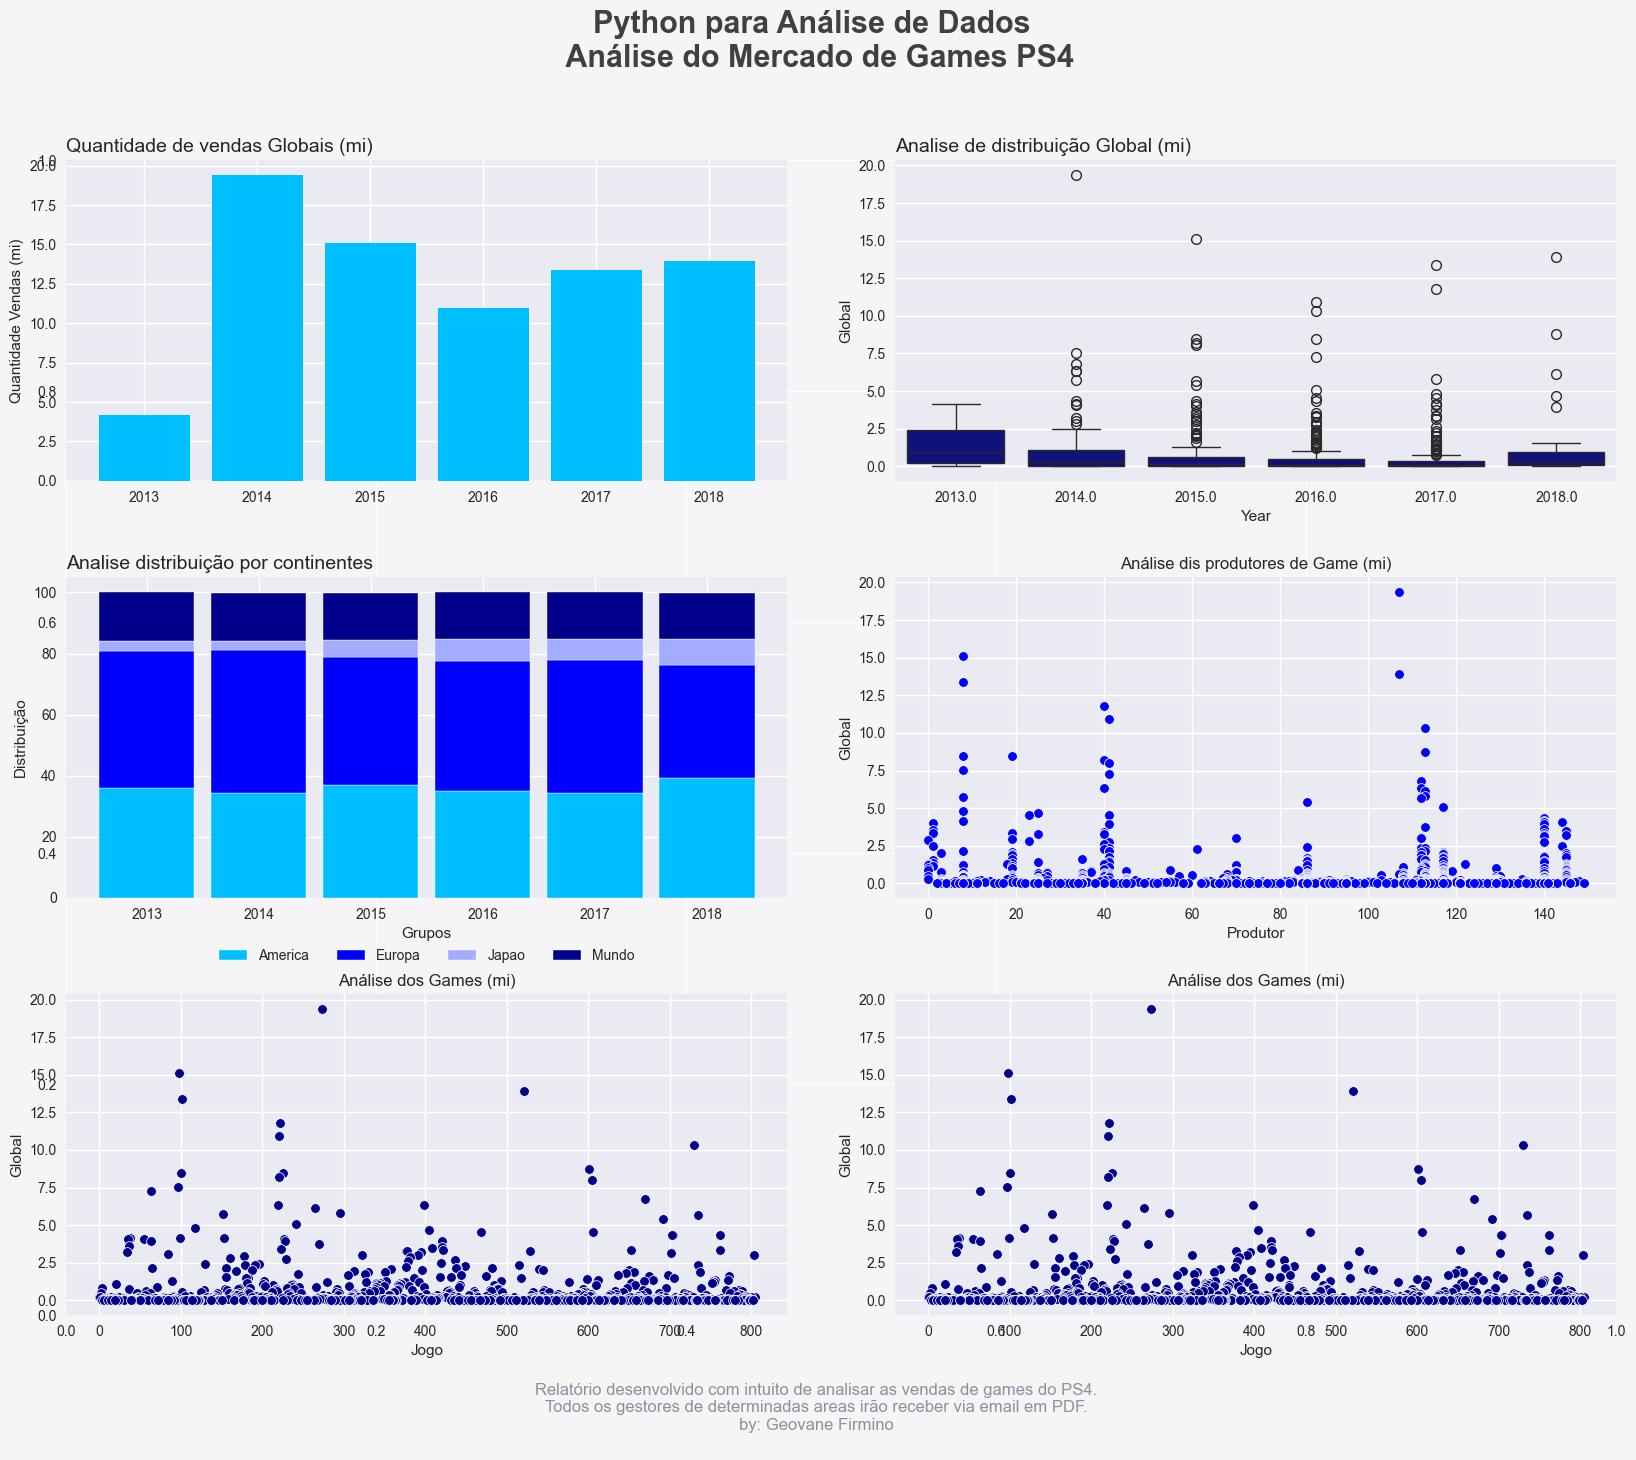

In [365]:
# Criando relátorio para report
# Tamanho da Imagem
fig, ax = plt.subplots(figsize=(20,15))

#Cor de fundo
Cor_fundo = '#f5f5f5'
ax.set_facecolor(Cor_fundo)
fig.set_facecolor(Cor_fundo)

#Estilo dos Grafico
plt.style.use('seaborn-v0_8')

#Titulo do report
plt.suptitle('Python para Análise de Dados \n Análise do Mercado de Games PS4', \
    fontsize = 22, color='#404040', fontweight = 600)

# Parametros para o grid
Colunas = 2
Linhas = 3

#Acessando grafico 1
plt.subplot(Linhas, Colunas, 1)
# Titulo
plt.title('Quantidade de vendas Globais (mi)', loc = 'left', fontsize = 14)
# Grafico
plt.bar(df['Year'], df['Global'], color='#00BFFF')
# Label
plt.ylabel('Quantidade Vendas (mi)')

##Acessando grafico 2 
plt.subplot(Linhas, Colunas, 2)
plt.title('Analise de distribuição Global (mi)', loc = 'left', fontsize = 14)
sns.boxplot(data=df, x='Year', y='Global', color = '#00008B');

# Acessando grafico 3
plt.subplot(Linhas, Colunas, 3)
# Largura barra no grafico
largura_barra = 0.85
Grupos =  Analise.index
# titulo
plt.title('Analise distribuição por continentes', loc = 'left', fontsize = 14 )
# Plot da America
plt.bar(Grupos, America, width = largura_barra, color = '#00BFFF', edgecolor= 'white')
# Plot da Europa
plt.bar(Grupos, Europa , bottom=America, width = largura_barra, color = '#0000FF', edgecolor= 'white')
# Plot do Japao
plt.bar(Grupos, Japao , bottom=[ A + B for A, B in zip(America, Europa)], width = largura_barra, color = '#a3acff', edgecolor= 'white')
# Plot do Mundo
plt.bar(Grupos, Mundo , bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao)], width = largura_barra, color = '#00008B', edgecolor= 'white')
# Labels
plt.xticks = (Grupos, Rotulos)
plt.xlabel('Grupos')
plt.ylabel('Distribuição')
# Legenda
plt.legend(['America', 'Europa', 'Japao', 'Mundo'], loc = 'center', bbox_to_anchor=(0.5, -0.18), ncols= 4 );

# Acessando Grafico 4
plt.subplot(Linhas, Colunas, 4)
plt.title('Análise dis produtores de Game (mi)')
sns.scatterplot(df, x='Produtor', y='Global', color ='#0000FF')

# Acessando Grafico 5
plt.subplot(Linhas, Colunas, 5)
plt.title('Análise dos Games (mi)')
sns.scatterplot(df, x='Jogo', y='Global', color ='#00008B')

# Acessando Grafico 4
plt.subplot(Linhas, Colunas, 6)

#ajustando layout graficos
plt.subplots_adjust(hspace=0.30 ,  wspace=0.15)
plt.title('Análise dos Games (mi)')
sns.scatterplot(df, x='Jogo', y='Global', color ='#00008B')

#rodapé
Rodape = '''
Relatório desenvolvido com intuito de analisar as vendas de games do PS4.
Todos os gestores de determinadas areas irão receber via email em PDF.
by: Geovane Firmino
'''

# Incluindo o rodape no relatorio
fig.text(0.5, 0.02, Rodape, ha='center', va='bottom', size=12, color ='#938ca1')
plt.savefig('report.png')
